# What factors affect the time to close a ticket?

In [88]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use(['fivethirtyeight'])
mpl.rcParams['lines.linewidth'] = 3
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split


In [89]:
df = pd.read_csv('311_cleaned_2.csv')
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,bbl,latitude,longitude,location,created_year,closed_year
0,20122811,03/28/2011 11:12:27 PM,03/29/2011 05:07:13 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11216.0,BROOKLYN,3.017890e+09,40.690123,-73.949135,"(40.69012317171803, -73.94913492072885)",2011,2011
1,20122821,03/28/2011 10:57:31 PM,05/19/2011 01:13:06 PM,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Dust from Construction,3+ Family Apartment Building,10009.0,NEW YORK,1.003910e+09,40.726053,-73.979818,"(40.726053362722304, -73.97981762009752)",2011,2011
2,20122822,03/28/2011 12:13:02 PM,05/19/2011 01:12:55 PM,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Dust from Construction,3+ Family Apartment Building,10009.0,NEW YORK,1.003910e+09,40.726053,-73.979818,"(40.726053362722304, -73.97981762009752)",2011,2011
3,20122823,03/28/2011 04:23:23 PM,05/19/2011 01:13:02 PM,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Dust from Construction,3+ Family Apartment Building,11360.0,BAYSIDE,4.058938e+09,40.779012,-73.782085,"(40.779012083546895, -73.78208491752011)",2011,2011
4,20122824,03/28/2011 11:14:53 AM,04/04/2011 12:46:58 PM,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Dust from Construction,3+ Family Apartment Building,11205.0,BROOKLYN,3.019170e+09,40.690711,-73.966360,"(40.69071138727672, -73.96636009530222)",2011,2011


In [90]:
df_filter = df.head(10000)

In [103]:
# Create function that calculates the time diff in minutes between created and closed date
from datetime import datetime, timedelta
import time
def getCallDuration(created, closed):
    # Assign format and type
    time_format = "%m/%d/%Y %I:%M:%S %p"
    created_date = datetime.strptime(created, time_format)
    closed_date = datetime.strptime(closed, time_format)
    
    # Convert to unix timestamp
    created_date = time.mktime(created_date.timetuple())
    closed_date = time.mktime(closed_date.timetuple())
    secs = int(closed_date-created_date)
    days = secs // (24 * 3600)
    return str(days)

In [105]:
# Calculate resolution time in number of days

In [106]:
# Now create a new column named Call Duration and store the values of the above function
df_filter['resolution_time']= df_filter[['created_date','closed_date']].apply(lambda x: getCallDuration(*x), axis=1)

In [107]:
def getMonth(s):
    month = s.split('/')[0]
    return int(month)

df_filter['Month']= df_filter['created_date'].apply(lambda x: getMonth(x))

In [108]:
df_filter.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,bbl,latitude,longitude,location,created_year,closed_year,resolution_time,Month
0,20122811,03/28/2011 11:12:27 PM,03/29/2011 05:07:13 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11216.0,BROOKLYN,3.017890e+09,40.690123,-73.949135,"(40.69012317171803, -73.94913492072885)",2011,2011,0,3
1,20122821,03/28/2011 10:57:31 PM,05/19/2011 01:13:06 PM,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Dust from Construction,3+ Family Apartment Building,10009.0,NEW YORK,1.003910e+09,40.726053,-73.979818,"(40.726053362722304, -73.97981762009752)",2011,2011,51,3
2,20122822,03/28/2011 12:13:02 PM,05/19/2011 01:12:55 PM,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Dust from Construction,3+ Family Apartment Building,10009.0,NEW YORK,1.003910e+09,40.726053,-73.979818,"(40.726053362722304, -73.97981762009752)",2011,2011,52,3
3,20122823,03/28/2011 04:23:23 PM,05/19/2011 01:13:02 PM,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Dust from Construction,3+ Family Apartment Building,11360.0,BAYSIDE,4.058938e+09,40.779012,-73.782085,"(40.779012083546895, -73.78208491752011)",2011,2011,51,3
4,20122824,03/28/2011 11:14:53 AM,04/04/2011 12:46:58 PM,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Dust from Construction,3+ Family Apartment Building,11205.0,BROOKLYN,3.019170e+09,40.690711,-73.966360,"(40.69071138727672, -73.96636009530222)",2011,2011,7,3


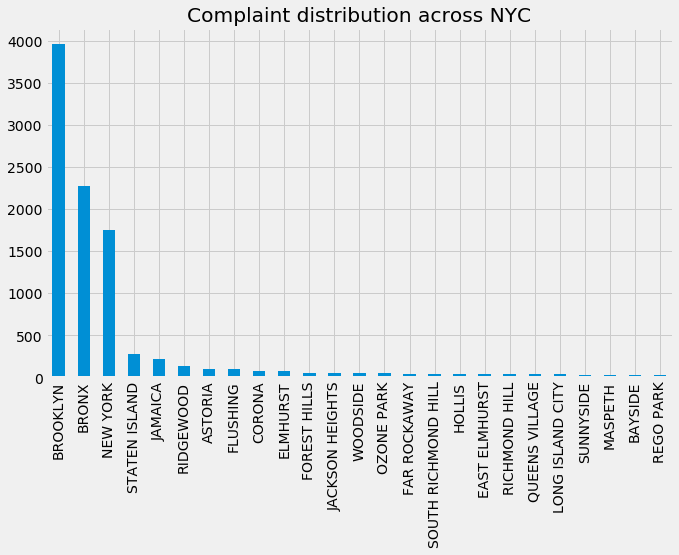

In [109]:
(df_filter['city'].value_counts()).head(25).plot(kind='bar',
                    figsize=(10,6), title = 'Complaint distribution across NYC')

In [111]:
df_Brooklyn = df_filter[df_filter['city']=='BROOKLYN']
df_Brooklyn.shape

(3958, 18)

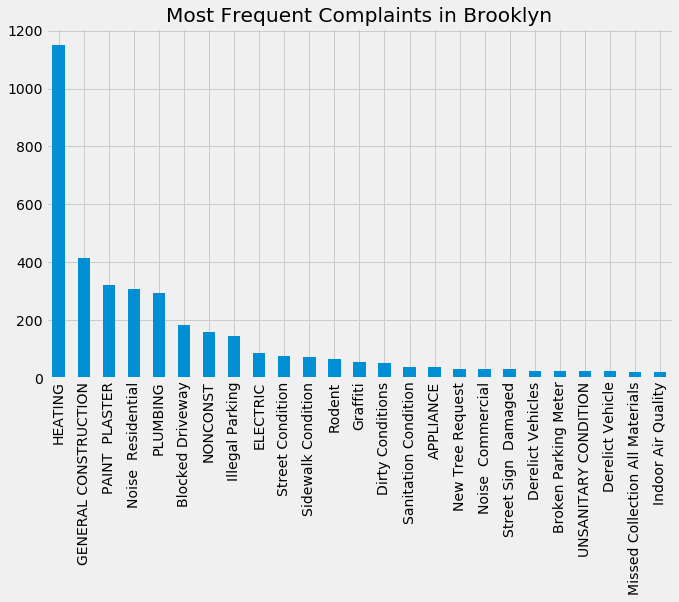

In [112]:
(df_Brooklyn['complaint_type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn')

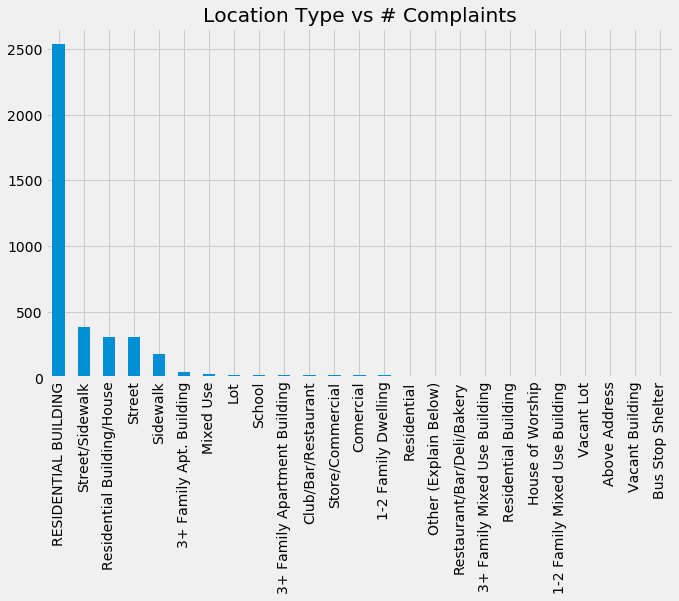

In [115]:
(df_Brooklyn['location_type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'Location Type vs # Complaints')

## This graph is telling us that most number of complaints came from residential locations. We can relate that most common complaint type is Heating and these must be coming from resedential buildings during the winters.

(-74.04004956341015, -73.86310539265226, 40.57275076392121, 40.73789197792883)

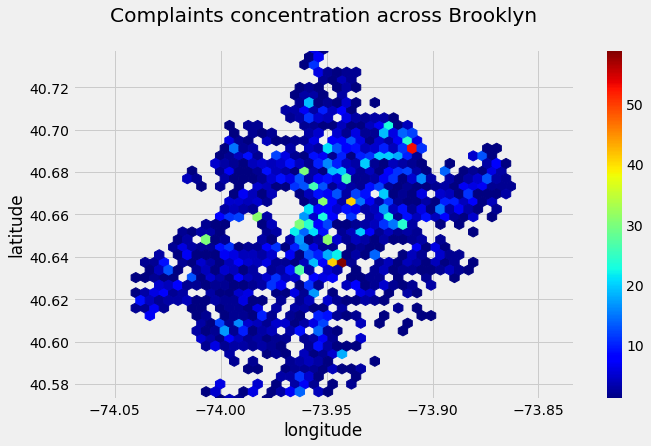

In [116]:
df_Brooklyn.plot(kind='hexbin', x='longitude', y='latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Complaints concentration across Brooklyn\n', figsize=(10,6)).axis('equal')

(-74.03826694474519, -73.86562177252608, 40.57372505527165, 40.736377707794)

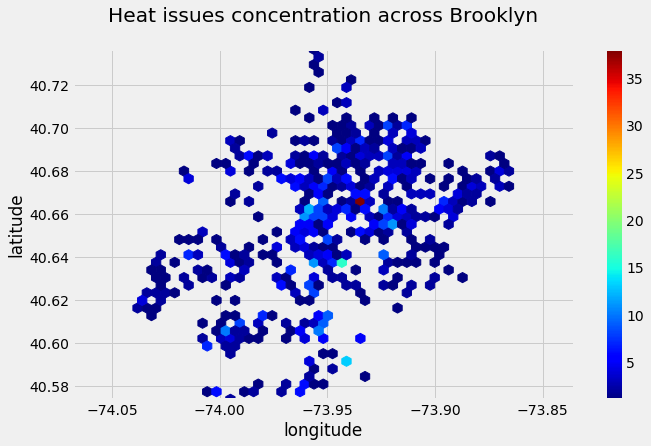

In [117]:
df_Brook_Heat = df_Brooklyn[df_Brooklyn['complaint_type'] == 'HEATING']
df_Brook_Heat[df_Brook_Heat['complaint_type'] == 'HEATING'].plot(
    kind='hexbin', x='longitude', y='latitude', gridsize=40,title = 'Heat issues concentration across Brooklyn\n',
    colormap='jet', mincnt=1, figsize=(10,6)).axis('equal')

In [118]:
df_filter[df_filter['complaint_type'] == 'HEATHOT WATER']['descriptor'].value_counts()

APARTMENT ONLY     15
ENTIRE BUILDING    15
Name: descriptor, dtype: int64

In [119]:
df_Brook_Heat

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,bbl,latitude,longitude,location,created_year,closed_year,resolution_time,Month
603,20124749,03/28/2011 12:00:00 AM,03/28/2011 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11213.0,BROOKLYN,3.013900e+09,40.668873,-73.932338,"(40.66887271462272, -73.93233848024539)",2011,2011,0,3
610,20124756,03/28/2011 12:00:00 AM,04/02/2011 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11226.0,BROOKLYN,3.048530e+09,40.653462,-73.949844,"(40.653461505472904, -73.94984401672039)",2011,2011,5,3
611,20124757,03/28/2011 12:00:00 AM,04/01/2011 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11211.0,BROOKLYN,3.028840e+09,40.717026,-73.940767,"(40.71702610668888, -73.94076692605162)",2011,2011,4,3
613,20124759,03/28/2011 12:00:00 AM,04/01/2011 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11211.0,BROOKLYN,3.029200e+09,40.713282,-73.940327,"(40.71328202455212, -73.94032657117829)",2011,2011,4,3
614,20124760,03/28/2011 12:00:00 AM,03/29/2011 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11203.0,BROOKLYN,3.014290e+09,40.663244,-73.934550,"(40.66324445328309, -73.93455012232168)",2011,2011,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,20102810,03/24/2011 12:00:00 AM,03/27/2011 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11217.0,BROOKLYN,3.021120e+09,40.686072,-73.976368,"(40.68607247077684, -73.97636825012631)",2011,2011,3,3
9364,20102812,03/24/2011 12:00:00 AM,03/28/2011 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11221.0,BROOKLYN,3.016450e+09,40.685951,-73.933439,"(40.68595134569906, -73.93343891563333)",2011,2011,4,3
9368,20102816,03/24/2011 12:00:00 AM,03/27/2011 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11221.0,BROOKLYN,3.033130e+09,40.692699,-73.922423,"(40.692699328170356, -73.92242288307399)",2011,2011,3,3
9376,20102826,03/24/2011 12:00:00 AM,03/28/2011 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11207.0,BROOKLYN,3.038220e+09,40.664408,-73.893966,"(40.66440818239797, -73.89396558361615)",2011,2011,4,3


###  Resolution time of heat issues in brooklyn

### A function to extract the features for the model. The features chosen from the dataset are based on intuition.  Similarly Incident Zip column is manipulated for bringing down the scale of column.

In [120]:
def buildFeatures(dataset):
    df_features = dataset.filter(['descriptor','incident_zip','resolution_time','Month'],axis = 1)
    data = pd.DataFrame({'descriptor': df_features.descriptor})
    dummies=pd.get_dummies(data)
    df_model=pd.concat([df_features,dummies],axis=1)
    df_model = df_model.drop('descriptor',1)
    df_model = df_model.dropna()
    df_model['incident_zip'] = df_model['incident_zip'].astype(int)
    df_model['resolution_time']=df_model['resolution_time'].astype(int)
    df_model['incident_zip']=df_model['incident_zip']-df_model['incident_zip'].min()
    return df_model

df_model = buildFeatures(df_Brook_Heat)
df_model = df_model[['incident_zip','Month','resolution_time']]
df_model.describe()


,incident_zip,Month,resolution_time
count,1152.000000,1152.0,1152.000000
mean,18.688368,3.0,2.990451
std,10.386665,0.0,1.466953
min,0.000000,3.0,0.000000
25%,11.000000,3.0,2.000000
50%,18.000000,3.0,3.000000
75%,28.000000,3.0,4.000000
max,37.000000,3.0,6.000000


In [137]:
df_model.drop(df_model[df_model.resolution_time > 6].index, inplace=True)
df_model.resolution_time.value_counts()

3    334
2    261
4    184
1    140
5    125
6     70
0     38
Name: resolution_time, dtype: int64

In [138]:
bins = [0,2,6]
group_names = [0,1]
df_model['categories'] = pd.cut(df_model['resolution_time'], bins,include_lowest=True,labels=group_names)
df_model.describe()

,incident_zip,Month,resolution_time
count,1152.000000,1152.0,1152.000000
mean,18.688368,3.0,2.990451
std,10.386665,0.0,1.466953
min,0.000000,3.0,0.000000
25%,11.000000,3.0,2.000000
50%,18.000000,3.0,3.000000
75%,28.000000,3.0,4.000000
max,37.000000,3.0,6.000000


In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
scaled = preprocessing.scale(df_model[['incident_zip', 'Month']])

data_clean = pd.DataFrame(scaled,index=df_model.index,columns= ['incident_zip', 'Month'] )
data_clean = pd.concat([data_clean, df_model.iloc[:,4:6],df_model['categories']], axis=1)

def splitter(dataset,y):
    X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.3)
    return X_train,X_test,y_train,y_test

X_train, X_test, y_train, y_test = splitter(data_clean,data_clean.categories)
X1 = X_train
Y1 = y_train
X2 = X_test
Y2 = y_test

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X1, Y1)

predicted = rf.predict(X2)
accuracy = accuracy_score(Y2, predicted)
accuracy


1.0

In [140]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [141]:
from sklearn.metrics import confusion_matrix
Y2_pred = rf.predict(X2)
cnf_matrix=confusion_matrix(Y2, Y2_pred)

Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


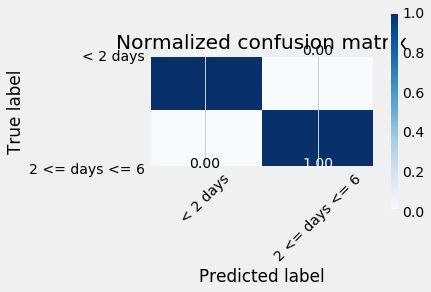

In [142]:
import itertools
class_names = ['< 2 days','2 <= days <= 6']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()